<a href="https://colab.research.google.com/github/SirimarcoUERJ/MachineLearning/blob/main/RandomForest_Census(SemEscalonamento).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ramdom Forest na Basa do Census(Sem Escalonamento dos dados.)**

In [28]:
from google.colab import drive
import pickle as pkl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [29]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
arq = "/content/drive/MyDrive/Colab Notebooks/Machine Learn/data/census(SemEscalonar).pkl"
with open(arq, "rb") as f:
  x_treino, y_treino, x_teste, y_teste = pkl.load(f)

In [31]:
x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [32]:
rf_censusSE = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
rf_censusSE.fit(x_treino,y_treino)

previsoes = rf_censusSE.predict(x_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [33]:
y_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [34]:
accuracy_score(y_teste,previsoes)

0.8509723643807574

0.8509723643807574

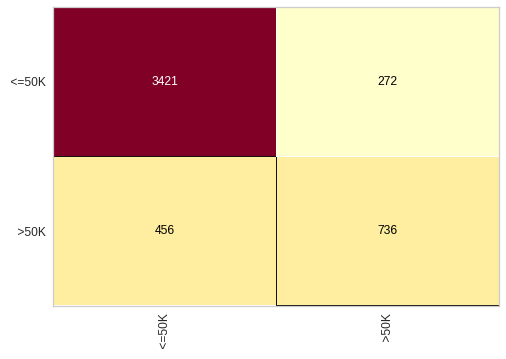

In [35]:
cm = ConfusionMatrix(rf_censusSE)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [36]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

